1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
np.random.seed(19680801)
x = np.random.normal(loc=0.0,scale=1.0,size=100)


[ 2. 13. 30. 37. 17.]


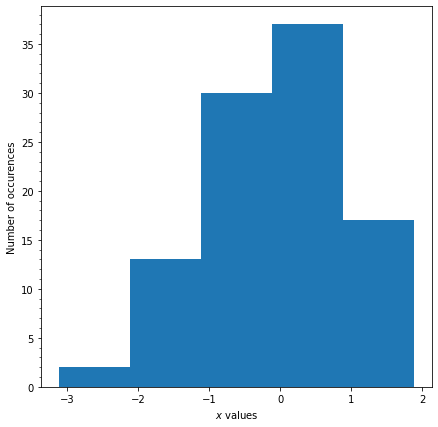

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
counts, bins, _ = ax1.hist(x, bins=np.arange(x.min(), x.max()))
ax1.set_ylabel('Number of occurences')
ax1.set_xlabel('$x$ values')
ax1.yaxis.set_major_locator(MultipleLocator(5))
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.xaxis.set_major_locator(MultipleLocator(1))
print(counts)




[0.70710678 0.2773501  0.18257419 0.16439899 0.24253563]
[ 2. 13. 30. 37. 17.]


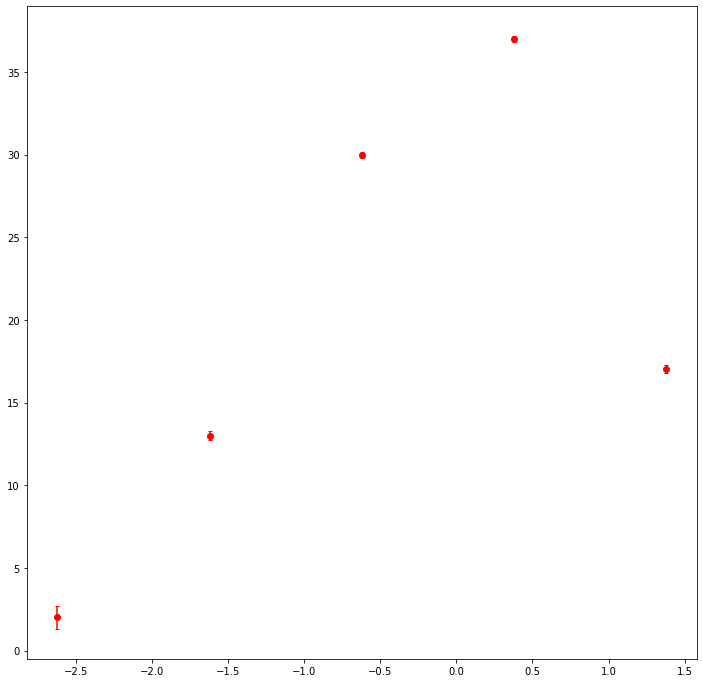

In [3]:
bin_centres = (bins[:-1] + bins[1:])/2
err = np.array(1/pow(counts,0.5))
print(err)
print(counts)
fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
ax2.errorbar(x=bin_centres, y=counts, yerr=err, fmt='o', capsize=2, color='r')

plt.show()


In [40]:
from scipy.stats import norm

print(x.shape)
std=1.06*x.std()*x.size**(-1/5)

x_all = np.arange(x.min(), x.max(), 0.001)
gauss = np.zeros((100,x_all.shape[0]))
for i in range(x.shape[0]):
    gauss[i,:] = norm.pdf(x_all,loc=x[i],scale=std)

print(gauss.shape)    

(100,)
(100, 5218)


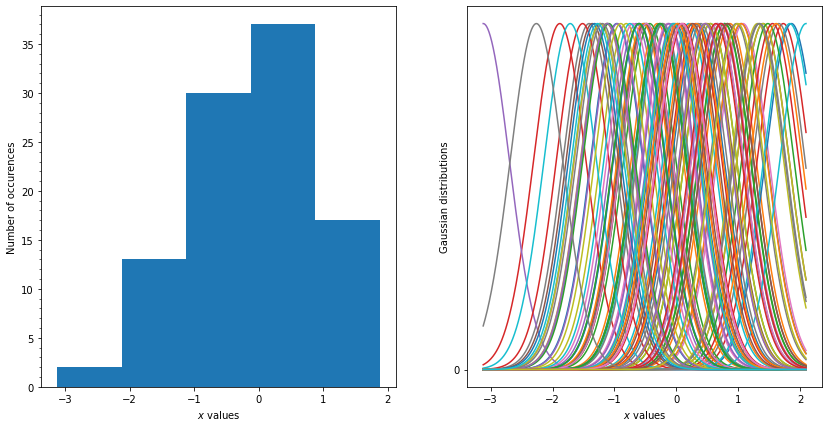

In [41]:
fig, (ax3,ax4) = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))


counts, bins, _ = ax3.hist(x, bins=np.arange(x.min(), x.max()))
ax3.set_ylabel('Number of occurences')
ax3.set_xlabel('$x$ values')
ax3.yaxis.set_major_locator(MultipleLocator(5))
ax3.yaxis.set_minor_locator(MultipleLocator(1))
ax3.xaxis.set_major_locator(MultipleLocator(1))

for i in range(gauss.shape[0]):
    ax4.plot(x_all, gauss[i,:])
ax4.set_ylabel('Gaussian distributions')
ax4.set_xlabel('$x$ values')
ax4.yaxis.set_major_locator(MultipleLocator(5))
ax4.yaxis.set_minor_locator(MultipleLocator(1))
ax4.xaxis.set_major_locator(MultipleLocator(1))

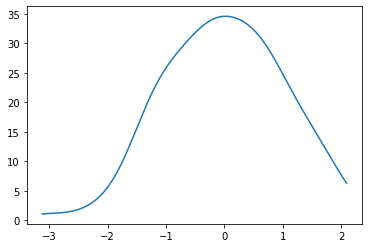

In [42]:
gauss_tot = gauss.sum(axis=0)

fig, ax5 = plt.subplots()
ax5.plot(x_all,gauss_tot)
ax5.set_ylabel('Sum of Gaussians')
ax5.set_xlabel('$x$ values')
ax5.yaxis.set_major_locator(MultipleLocator(5))
ax5.yaxis.set_minor_locator(MultipleLocator(1))
ax5.xaxis.set_major_locator(MultipleLocator(1))

99.0
97.5350135008061
99.0


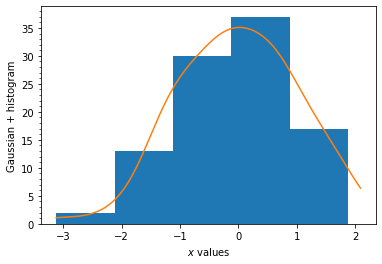

In [62]:
from scipy import integrate
area_hist = sum(np.diff(bins)*counts)
print(area_hist)
normaliz = integrate.trapz(gauss_tot,x_all)   #The integral of the curve needs to be divided by normaliz
                                              #and multiplied by area_hist so that they match.
print(normaliz)                                     
gauss_norm = gauss_tot*area_hist/normaliz
print(integrate.trapz(gauss_norm,x_all))

fig, ax6 = plt.subplots()
ax6.hist(x, bins=np.arange(x.min(), x.max()))
ax6.plot(x_all,gauss_norm)
ax6.set_ylabel('Gaussian + histogram')
ax6.set_xlabel('$x$ values')
ax6.yaxis.set_major_locator(MultipleLocator(5))
ax6.yaxis.set_minor_locator(MultipleLocator(1))
ax6.xaxis.set_major_locator(MultipleLocator(1))

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2023-01-18 19:34:39--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2023-01-18 19:34:41--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc109f24c5fa6a168caf5e71598a.dl.dropboxusercontent.com/cd/0/inline/B0yfsR1EOeHeVtUcAWQThaSHjMDkNPckiZV_kC7-P6IbBx-a7ryLjUeMZ3Pm47l_ns7E9crQpvcHhjFwu4arVvvRiwtDFBNiDEPqcHLWCSLpl3Gb_aPq4JQ0LNRTLG3zfgq7j4u0imsY4lQVCAPfBGjZNPXQRhoUT26M6yKJWfum-g/file# [segue]
--2023-01-18 19:34:42--  https://uc109f24c5fa6a168caf5e71598a.dl.dropboxusercontent.com/cd/0/i

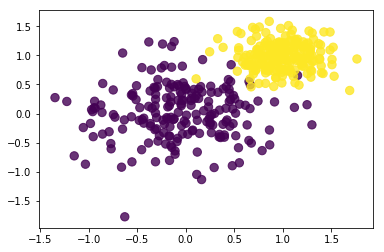

In [63]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot